# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [2]:
def image_generator(x1, x2, y1, y2, upsampled=False):
    if upsampled:
        image = np.zeros([1000, 1000], np.float32)
    else:
        image = np.zeros([100, 100], np.float32)
    image[y1:y2, x1:x2] = 1
    image = itk.image_view_from_array(image)
    return image

## Size transformation test
See example 12 for more explanation

In [3]:
# Create small images for registration
fixed_image_small = image_generator(25,75,25,75)
fixed_image_small.SetSpacing([10,10])
moving_image_small = image_generator(0,50,10,60)
moving_image_small.SetSpacing([10,10])

# .. and a big moving image for transformation
moving_image_large = image_generator(0,500,100,600, upsampled=True)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid',4)
default_rigid_parameter_map['FinalBSplineInterpolationOrder'] = ['0']
parameter_object.AddParameterMap(default_rigid_parameter_map)

# Call elastix
result_image_small, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_small, moving_image_small,
    parameter_object=parameter_object)

# Adjust parameter file with spacing and size of large image.
result_transform_parameters.SetParameter("Size", ['1000', '1000'])
result_transform_parameters.SetParameter("Spacing", ['1', '1'])

# Call transformix with procedural method
result_image_large = itk.transformix_filter(
    moving_image_large,
    result_transform_parameters,
    log_to_console=True)

## Size transformation test visualization


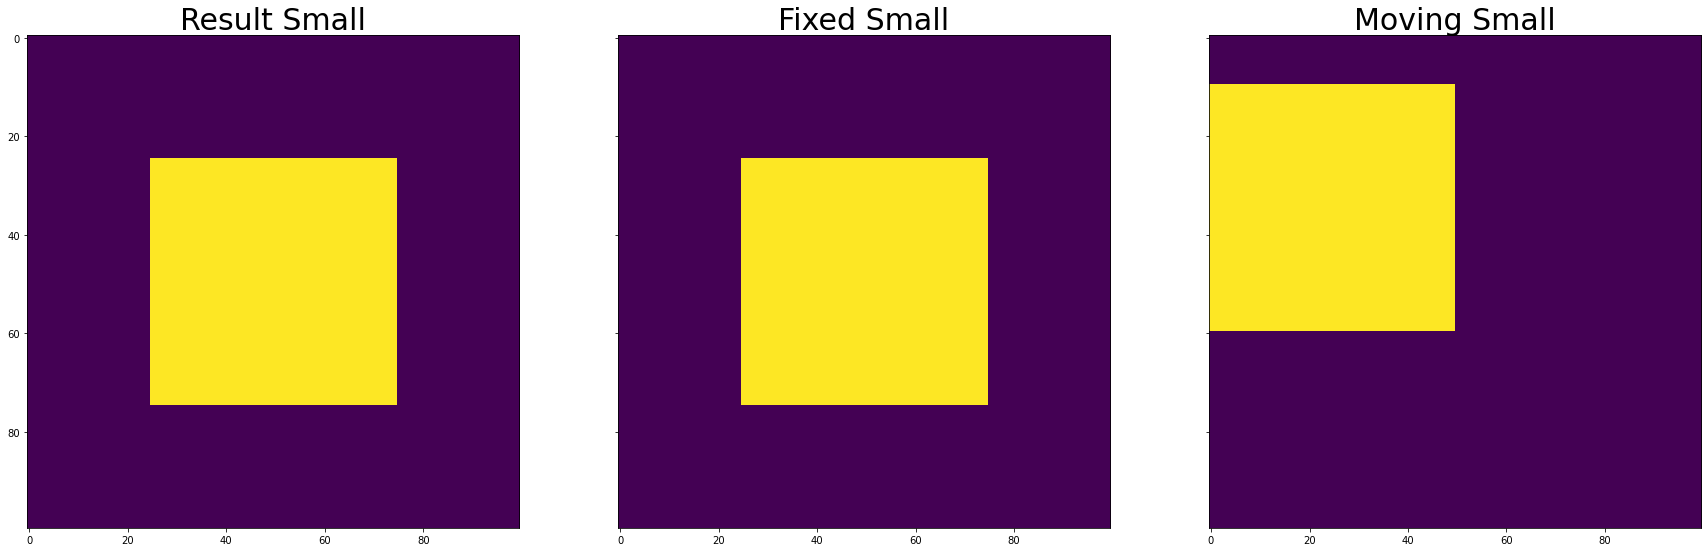

In [4]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_small)
axs[0].set_title('Result Small', fontsize=30)
axs[1].imshow(fixed_image_small)
axs[1].set_title('Fixed Small', fontsize=30)
axs[2].imshow(moving_image_small)
axs[2].set_title('Moving Small', fontsize=30)
plt.show()

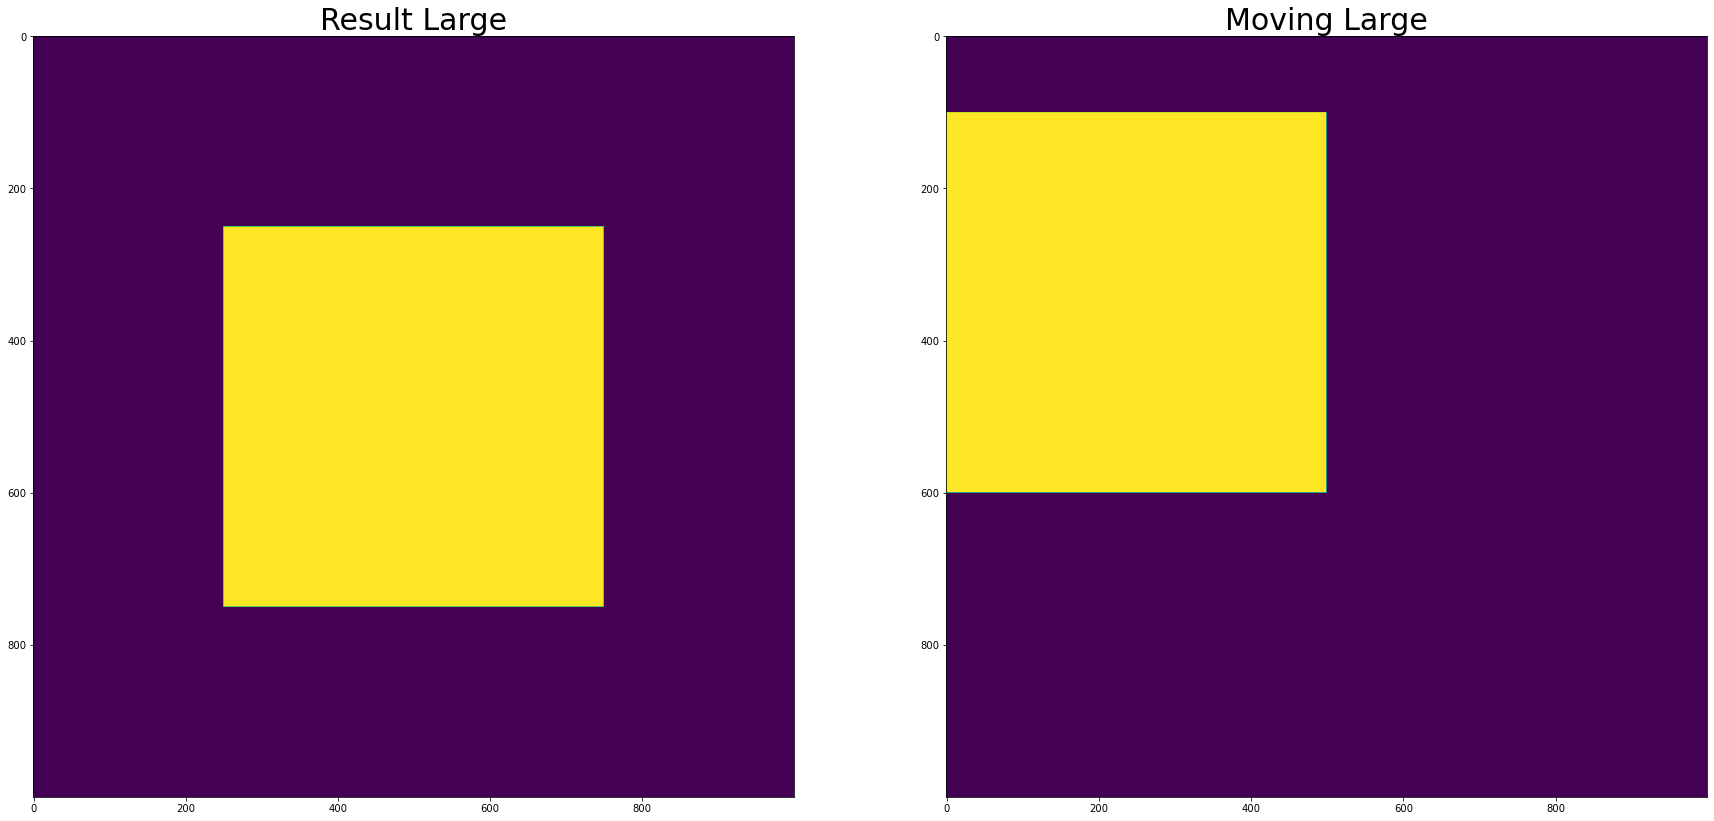

In [5]:
fig, axs = plt.subplots(1,2, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_large)
axs[0].set_title('Result Large', fontsize=30)
axs[1].imshow(moving_image_large)
axs[1].set_title('Moving Large', fontsize=30)
plt.show()